DATA ANALYST

In [1]:
pip install pycoingecko
pip install plotly

In [2]:
import pandas as pd
import datetime as dt
import time as t
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [4]:
cg.ping()  

{'gecko_says': '(V3) To the Moon!'}

In [5]:
#get the coin list in a df
coin_list = cg.get_coins_list()
df_coin = pd.DataFrame.from_dict(coin_list).sort_values('id').reset_index(drop=True)
print(df_coin)

                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10050                  zynecoin    zyn                   Zynecoin
10051                   zynergy    zyn                    Zynergy
10052                     zyrri    zyr                      Zyrri
10053                       zyx    zyx                        ZYX
10054                       zzz    zzz                GoSleep ZZZ

[10055 rows x 3 columns]


In [6]:
#df_coin[df_coin['id'] == 'bitcoin']
#df_coin[df_coin['id'] == 'chainlink']
#df_coin[df_coin['id'] == 'ethereum']
#df_coin[df_coin['id'] == 'ripple']
#df_coin[df_coin['id'] == 'solana']
#df_coin[df_coin['id'] == 'litecoin']
#df_coin[df_coin['id'] == 'dogecoin']
#df_coin[df_coin['id'] == 'uniswap']
#df_coin[df_coin['id'] == 'polkadot']
#df_coin[df_coin['id'] == 'cardano']

In [7]:
coins = ['Bitcoin','Ethereum','XRP','Solana','Litecoin','Dogecoin','Uniswap','Polkadot','Cardano','Chainlink']

In [8]:
id_coins = ['bitcoin','chainlink','ethereum','ripple','solana','litecoin','dogecoin','uniswap','polkadot','cardano']

In [9]:
#get the currencies
currencies = cg.get_supported_vs_currencies()
use_currencies = 'usd'

In [10]:
#Get the simple price of the coins we choose 
price = cg.get_price(ids= coins, vs_currencies= use_currencies)
print(price)

{'bitcoin': {'usd': 29197}, 'cardano': {'usd': 0.281649}, 'chainlink': {'usd': 7.0}, 'dogecoin': {'usd': 0.07109}, 'ethereum': {'usd': 1827.18}, 'litecoin': {'usd': 79.28}, 'polkadot': {'usd': 4.81}, 'solana': {'usd': 23.88}, 'uniswap': {'usd': 5.89}}


In [11]:
#Get the price of the coins
from xml.etree.ElementInclude import include


complex_price = price = cg.get_price(ids= coins, vs_currencies= use_currencies,include_market_cap = True,include_24hr_vol = True,
                                     include_24hr_change = True,include_last_updated_at = True)

print(complex_price)

{'bitcoin': {'usd': 29197, 'usd_market_cap': 567954616232.1978, 'usd_24h_vol': 11819511731.104761, 'usd_24h_change': -0.736875306375519, 'last_updated_at': 1692148428}, 'cardano': {'usd': 0.281649, 'usd_market_cap': 9862024376.307709, 'usd_24h_vol': 180250535.73426238, 'usd_24h_change': -3.0662250475559993, 'last_updated_at': 1692148427}, 'chainlink': {'usd': 7.0, 'usd_market_cap': 3771897271.0329494, 'usd_24h_vol': 298938559.15131694, 'usd_24h_change': -5.598884326922087, 'last_updated_at': 1692148425}, 'dogecoin': {'usd': 0.07109, 'usd_market_cap': 9990329856.838116, 'usd_24h_vol': 527639279.0979983, 'usd_24h_change': -4.913233121987578, 'last_updated_at': 1692148428}, 'ethereum': {'usd': 1827.18, 'usd_market_cap': 219495626810.2484, 'usd_24h_vol': 4494566523.540595, 'usd_24h_change': -0.9959738335040393, 'last_updated_at': 1692148425}, 'litecoin': {'usd': 79.28, 'usd_market_cap': 5828264176.764046, 'usd_24h_vol': 600203141.4288254, 'usd_24h_change': -3.4354764871832097, 'last_update

In [12]:
#Get the historical data of the coins
dataMarket_coins = cg.get_coins_markets(vs_currency= use_currencies,ids = id_coins,price_change_percentage = '24h,30d,1y',sparkline = True)
print(dataMarket_coins)

[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579', 'current_price': 29197, 'market_cap': 567954616232, 'market_cap_rank': 1, 'fully_diluted_valuation': 612945769744, 'total_volume': 11819511731, 'high_24h': 29414, 'low_24h': 29119, 'price_change_24h': -216.74340400407164, 'price_change_percentage_24h': -0.73688, 'market_cap_change_24h': -4418492650.775757, 'market_cap_change_percentage_24h': -0.77196, 'circulating_supply': 19458568.0, 'total_supply': 21000000.0, 'max_supply': 21000000.0, 'ath': 69045, 'ath_change_percentage': -57.70088, 'ath_date': '2021-11-10T14:24:11.849Z', 'atl': 67.81, 'atl_change_percentage': 42969.99148, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2023-08-16T01:13:48.278Z', 'sparkline_in_7d': {'price': [29779.56167125089, 29781.206621091707, 29847.466991735273, 29669.871897046327, 29702.911698425673, 29746.090645605516, 29720.533374848663, 29717.8232

In [59]:
dfmarket_coins = pd.DataFrame.from_dict(dataMarket_coins).sort_values('id').reset_index(drop=True)
dfmarket_coins

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,sparkline_in_7d,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29197.000000,567954616232,1,612945769744,11819511731,29414.000000,...,2021-11-10T14:24:11.849Z,67.810000,42969.99148,2013-07-06T00:00:00.000Z,None,2023-08-16T01:13:48.278Z,"{'price': [29779.56167125089, 29781.2066210917...",20.887431,-0.736875,-3.401386
1,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.281649,9862024376,9,12663456503,180250536,0.290558,...,2021-09-02T06:00:10.474Z,0.019253,1362.28398,2020-03-13T02:22:55.044Z,None,2023-08-16T01:13:47.229Z,"{'price': [0.29832183656777395, 0.298603211097...",-49.311188,-3.066225,-10.385296
2,chainlink,link,Chainlink,https://assets.coingecko.com/coins/images/877/...,7.000000,3771897271,22,7009658935,298938559,7.420000,...,2021-05-10T00:13:57.214Z,0.148183,4630.50090,2017-11-29T00:00:00.000Z,None,2023-08-16T01:13:45.404Z,"{'price': [7.446212665023167, 7.44274077507258...",-19.291140,-5.598884,5.748715
3,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.071090,9990329857,8,9990314226,527639279,0.074898,...,2021-05-08T05:08:23.458Z,0.000087,81663.03420,2015-05-06T00:00:00.000Z,None,2023-08-16T01:13:48.825Z,"{'price': [0.075010141400058, 0.07505822844516...",-10.129045,-4.913233,1.967229
4,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1827.180000,219495626810,2,219495626810,4494566524,1845.720000,...,2021-11-10T14:24:19.604Z,0.432979,422194.85730,2015-10-20T00:00:00.000Z,"{'times': 82.68224416273128, 'currency': 'btc'...",2023-08-16T01:13:45.210Z,"{'price': [1856.3023579541916, 1855.3044895216...",-3.688286,-0.995974,-4.941694
5,litecoin,ltc,Litecoin,https://assets.coingecko.com/coins/images/2/la...,79.280000,5828264177,15,6656713851,600203141,82.100000,...,2021-05-10T03:13:07.904Z,1.150000,6798.33314,2015-01-14T00:00:00.000Z,None,2023-08-16T01:13:54.509Z,"{'price': [83.9136660251019, 84.08745058956518...",30.397012,-3.435476,-14.231986
6,polkadot,dot,Polkadot,https://assets.coingecko.com/coins/images/1217...,4.810000,6079168173,12,6468158555,109037616,4.990000,...,2021-11-04T14:10:09.301Z,2.700000,78.40295,2020-08-20T05:48:11.359Z,None,2023-08-16T01:13:50.557Z,"{'price': [5.061940755786733, 5.05456959550808...",-45.504995,-3.645345,-9.398846
7,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.608388,32076031494,5,60764693288,1193827354,0.631126,...,2018-01-07T00:00:00.000Z,0.002686,22535.78652,2014-05-22T00:00:00.000Z,None,2023-08-16T01:13:50.238Z,"{'price': [0.6426242001562646, 0.6388921880859...",61.705426,-3.571843,-18.671890
8,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,23.890000,9692981564,10,13239685166,468489585,25.170000,...,2021-11-06T21:54:35.825Z,0.500801,4665.26224,2020-05-11T19:35:23.449Z,None,2023-08-16T01:13:55.018Z,"{'price': [24.203816824917432, 24.357482504829...",-45.399308,-5.115522,-14.221045
9,uniswap,uni,Uniswap,https://assets.coingecko.com/coins/images/1250...,5.890000,4436863167,19,5886255470,111941549,6.290000,...,2021-05-03T05:25:04.822Z,1.030000,473.22235,2020-09-17T01:20:38.214Z,None,2023-08-16T01:13:47.869Z,"{'price': [6.084752031868915, 6.06278150358147...",-30.458210,-6.318317,2.843548


In [15]:
dfmarket_filter = dfmarket_coins[['id','current_price','market_cap','market_cap_rank','fully_diluted_valuation','total_volume','high_24h','low_24h','price_change_24h','price_change_percentage_1y_in_currency','price_change_percentage_24h_in_currency','price_change_percentage_30d_in_currency']]


In [16]:
dfmarket_filter

,id,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency
0,bitcoin,29197.000000,567954616232,1,612945769744,11819511731,29414.000000,29119.000000,-216.743404,20.887431,-0.736875,-3.401386
1,cardano,0.281649,9862024376,9,12663456503,180250536,0.290558,0.279226,-0.008909,-49.311188,-3.066225,-10.385296
2,chainlink,7.000000,3771897271,22,7009658935,298938559,7.420000,6.980000,-0.415364,-19.291140,-5.598884,5.748715
3,dogecoin,0.071090,9990329857,8,9990314226,527639279,0.074898,0.070727,-0.003673,-10.129045,-4.913233,1.967229
4,ethereum,1827.180000,219495626810,2,219495626810,4494566524,1845.720000,1818.530000,-18.381270,-3.688286,-0.995974,-4.941694
5,litecoin,79.280000,5828264177,15,6656713851,600203141,82.100000,78.840000,-2.820567,30.397012,-3.435476,-14.231986
6,polkadot,4.810000,6079168173,12,6468158555,109037616,4.990000,4.750000,-0.181965,-45.504995,-3.645345,-9.398846
7,ripple,0.608388,32076031494,5,60764693288,1193827354,0.631126,0.596803,-0.022536,61.705426,-3.571843,-18.671890
8,solana,23.890000,9692981564,10,13239685166,468489585,25.170000,23.760000,-1.287804,-45.399308,-5.115522,-14.221045
9,uniswap,5.890000,4436863167,19,5886255470,111941549,6.290000,5.890000,-0.397161,-30.458210,-6.318317,2.843548


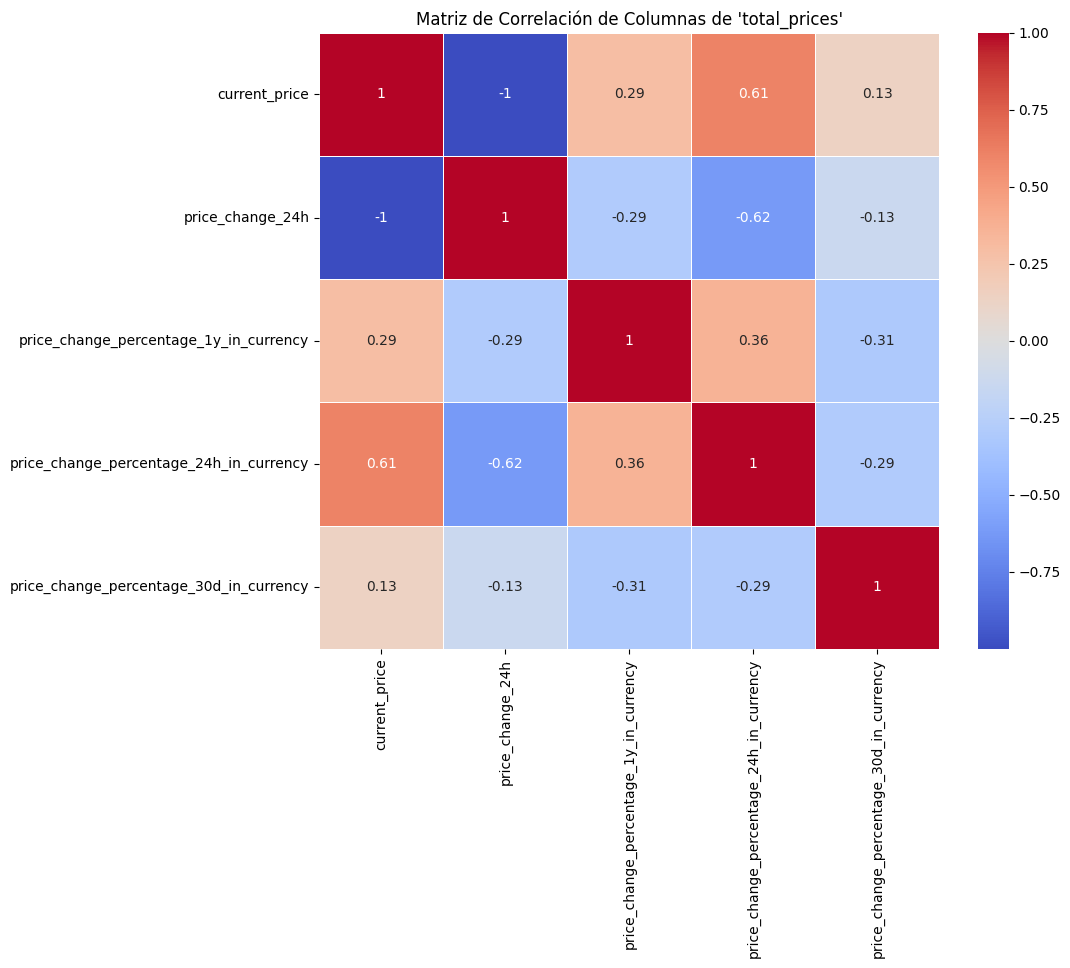

In [57]:
correlation_prices = dfmarket_filter.filter(like='price').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_prices, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación de Columnas de 'total_prices'")
plt.show()

In [17]:
import datetime
import time

date_time = datetime.datetime(2020,1,1)
timestamp = time.mktime(date_time.timetuple())

print(timestamp)


1577854800.0


In [18]:
import datetime
import time

date_time = datetime.datetime(2023,12,31)
timestamp = time.mktime(date_time.timetuple())

print(timestamp)

1703998800.0


In [19]:
#get daily historical data
daily_bitcoin = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_bitcoin = cg.get_coin_market_chart_range_by_id(id = 'bitcoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_bitcoin = pd.DataFrame(data = daily_bitcoin['prices'],
                                        columns = ['Date', 'Price bitcoin'])
#reformat date
df_hist_bitcoin['Date'] = df_hist_bitcoin['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_bitcoin = df_hist_bitcoin.set_index('Date')

print(df_hist_bitcoin)


            Price bitcoin
Date                     
27-04-2013     135.300000
28-04-2013     141.960000
29-04-2013     135.300000
30-04-2013     117.000000
01-05-2013     103.430000
...                   ...
11-08-2023   29396.847971
12-08-2023   29412.142275
13-08-2023   29284.969714
14-08-2023   29400.586804
15-08-2023   29164.865648

[3761 rows x 1 columns]


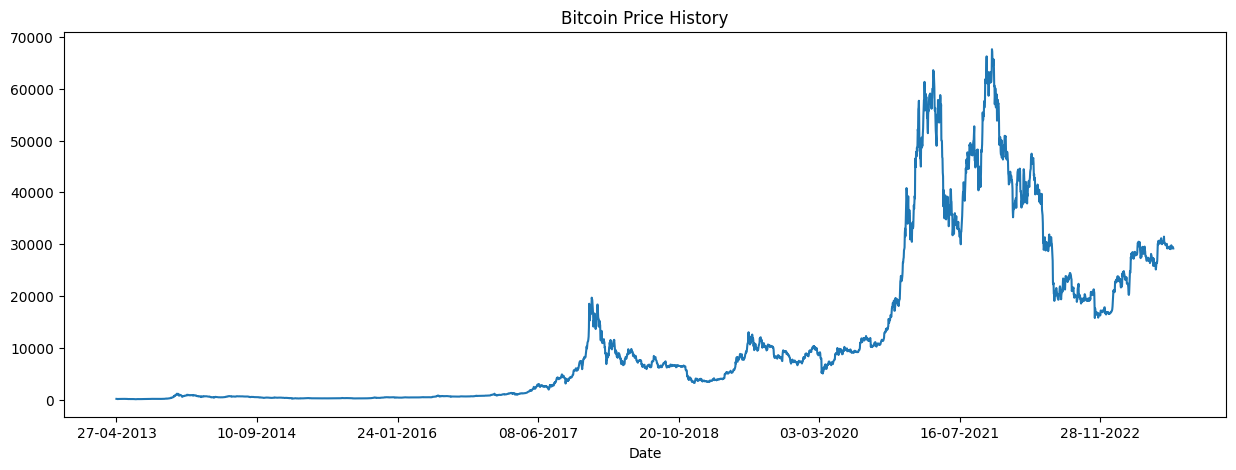

In [20]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_bitcoin['Price bitcoin'].plot(ax=ax)
ax.set_title('Bitcoin Price History')
plt.show()

In [21]:
#get daily historical data
daily_chainlink = cg.get_coin_market_chart_by_id(id = 'chainlink', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_chainlink = cg.get_coin_market_chart_range_by_id(id = 'chainlink', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_chainlink = pd.DataFrame(data = daily_chainlink['prices'],
                                        columns = ['Date', 'Price chainlink'])
#reformat date
df_hist_chainlink['Date'] = df_hist_chainlink['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_chainlink = df_hist_chainlink.set_index('Date')

print(df_hist_chainlink)


            Price chainlink
Date                       
08-11-2017         0.225377
09-11-2017         0.189036
10-11-2017         0.181223
11-11-2017         0.170013
12-11-2017         0.180691
...                     ...
11-08-2023         7.484950
12-08-2023         7.437998
13-08-2023         7.368214
14-08-2023         7.411531
15-08-2023         7.284006

[2107 rows x 1 columns]


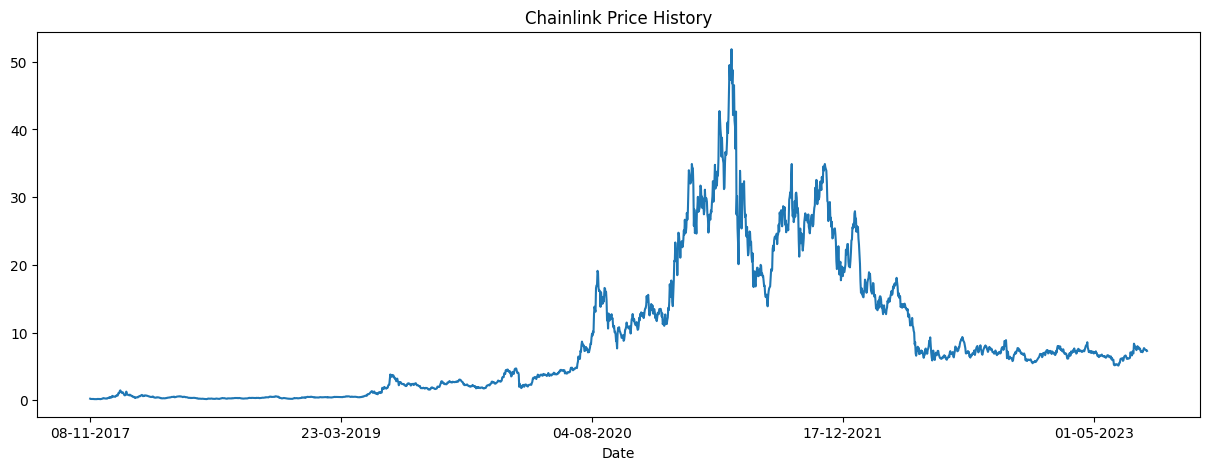

In [22]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_chainlink['Price chainlink'].plot(ax=ax)
ax.set_title('Chainlink Price History')
plt.show()


In [23]:
#get daily historical data
daily_ethereum = cg.get_coin_market_chart_by_id(id = 'ethereum', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_ethereum = cg.get_coin_market_chart_range_by_id(id = 'ethereum', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_ethereum = pd.DataFrame(data = daily_ethereum['prices'],
                                        columns = ['Date', 'Price ethereum'])
#reformat date
df_hist_ethereum['Date'] = df_hist_ethereum['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_ethereum = df_hist_ethereum.set_index('Date')

print(df_hist_ethereum)

            Price ethereum
Date                      
06-08-2015        2.831620
07-08-2015        1.330750
09-08-2015        0.687586
10-08-2015        1.067379
11-08-2015        1.256613
...                    ...
11-08-2023     1847.541835
12-08-2023     1848.505239
13-08-2023     1839.512810
14-08-2023     1843.513391
15-08-2023     1826.746827

[2931 rows x 1 columns]


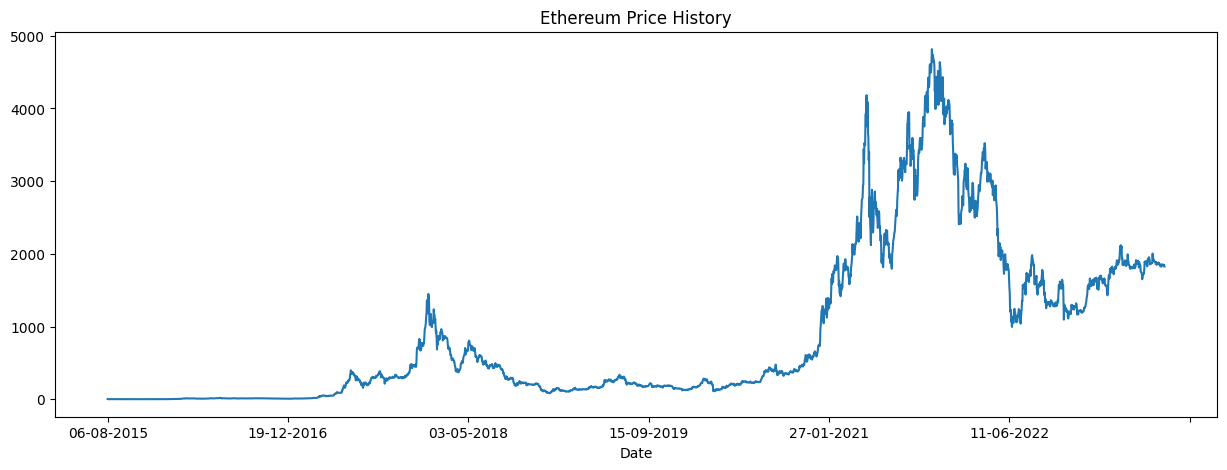

In [24]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_ethereum['Price ethereum'].plot(ax=ax)
ax.set_title('Ethereum Price History')
plt.show()

In [25]:
#get daily historical data
daily_ripple = cg.get_coin_market_chart_by_id(id = 'ripple', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_ripple = cg.get_coin_market_chart_range_by_id(id = 'ripple', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_ripple = pd.DataFrame(data = daily_ripple['prices'],
                                        columns = ['Date', 'Price ripple'])
#reformat date
df_hist_ripple['Date'] = df_hist_ripple['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_ripple = df_hist_ripple.set_index('Date')

print(df_hist_ripple)

            Price ripple
Date                    
03-08-2013      0.005874
04-08-2013      0.005653
05-08-2013      0.004669
06-08-2013      0.004486
07-08-2013      0.004196
...                  ...
11-08-2023      0.631618
12-08-2023      0.627081
13-08-2023      0.625689
14-08-2023      0.634681
15-08-2023      0.626763

[3660 rows x 1 columns]


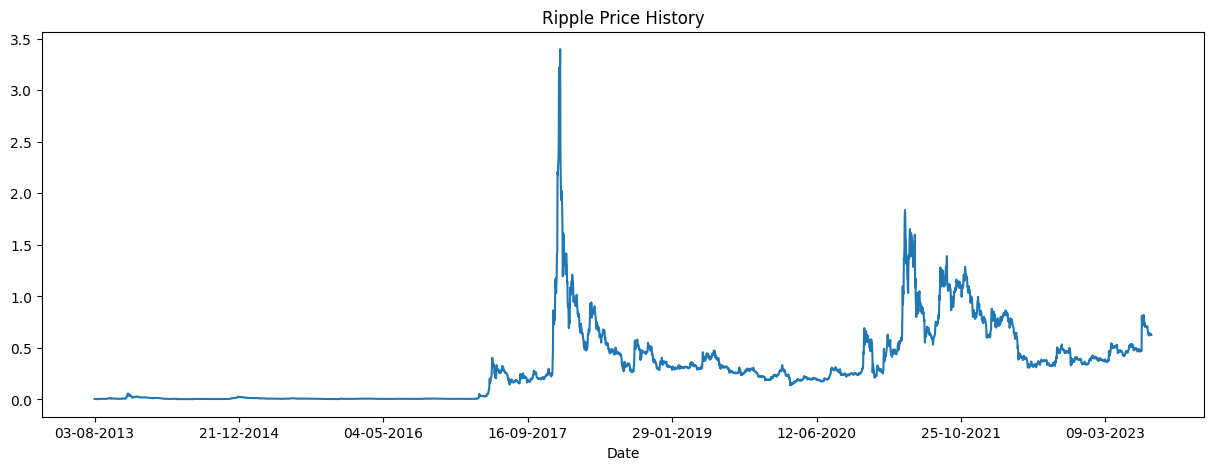

In [26]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_ripple['Price ripple'].plot(ax=ax)
ax.set_title('Ripple Price History')
plt.show()

In [27]:
#get daily historical data
daily_solana = cg.get_coin_market_chart_by_id(id = 'solana', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_solana = cg.get_coin_market_chart_range_by_id(id = 'solana', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_solana = pd.DataFrame(data = daily_solana['prices'],
                                        columns = ['Date', 'Price solana'])
#reformat date
df_hist_solana['Date'] = df_hist_solana['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_solana = df_hist_solana.set_index('Date')

print(df_hist_solana)

            Price solana
Date                    
10-04-2020      0.957606
11-04-2020      0.784711
12-04-2020      0.875994
13-04-2020      0.786712
14-04-2020      0.666673
...                  ...
11-08-2023     24.579810
12-08-2023     24.891819
13-08-2023     24.223294
14-08-2023     25.147725
15-08-2023     24.077192

[1223 rows x 1 columns]


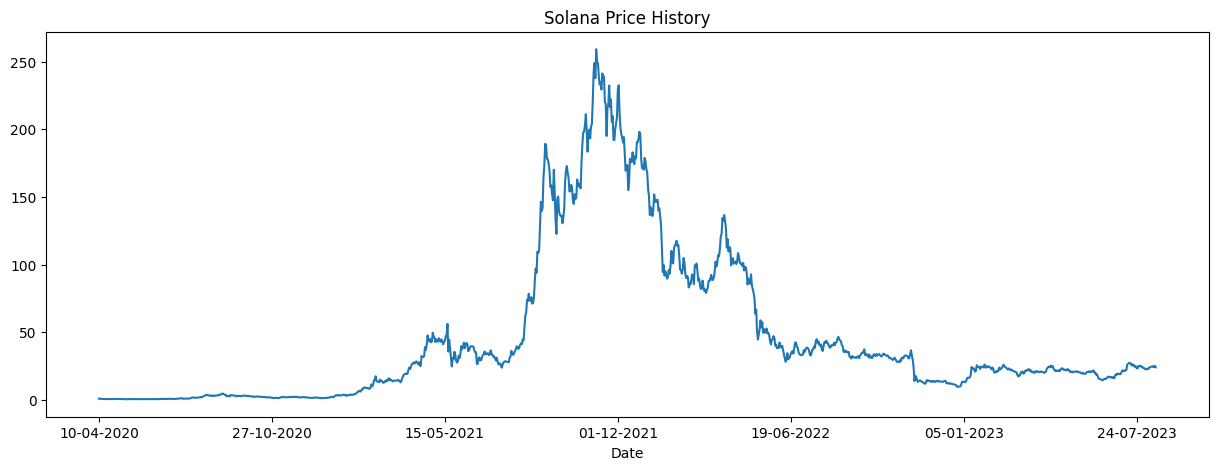

In [28]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_solana['Price solana'].plot(ax=ax)
ax.set_title('Solana Price History')
plt.show()

In [29]:
#get daily historical data
daily_litecoin = cg.get_coin_market_chart_by_id(id = 'litecoin', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_litecoin = cg.get_coin_market_chart_range_by_id(id = 'litecoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_litecoin = pd.DataFrame(data = daily_litecoin['prices'],
                                        columns = ['Date', 'Price litecoin'])
#reformat date
df_hist_litecoin['Date'] = df_hist_litecoin['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_litecoin = df_hist_litecoin.set_index('Date')

print(df_hist_litecoin)

            Price litecoin
Date                      
27-04-2013        4.299830
28-04-2013        4.359400
29-04-2013        4.182950
30-04-2013        3.649140
01-05-2013        3.388790
...                    ...
11-08-2023       83.508009
12-08-2023       83.399575
13-08-2023       81.946229
14-08-2023       82.043497
15-08-2023       81.752768

[3761 rows x 1 columns]


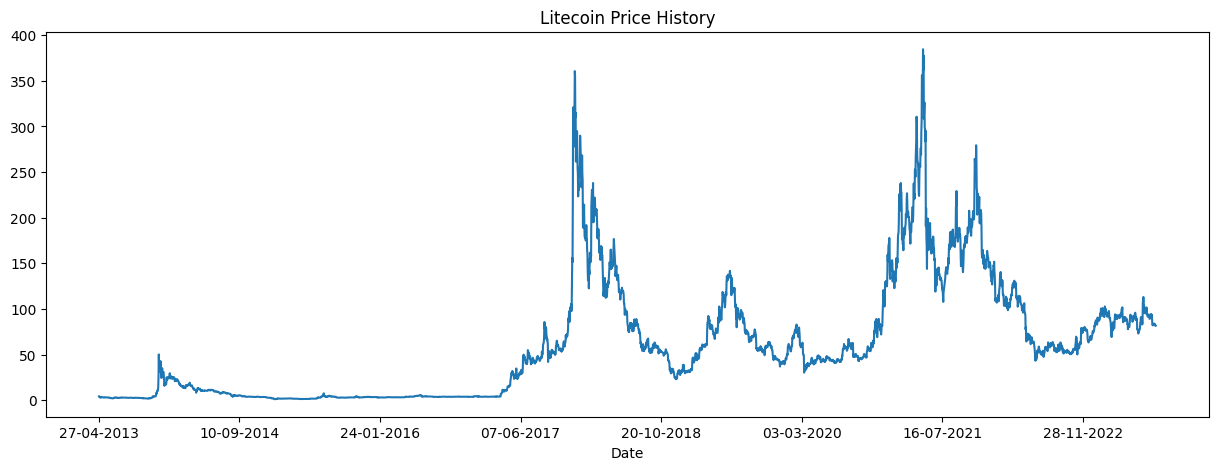

In [30]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_litecoin['Price litecoin'].plot(ax=ax)
ax.set_title('Litecoin Price History')
plt.show()

In [31]:
#get daily historical data
daily_dogecoin = cg.get_coin_market_chart_by_id(id = 'dogecoin', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_dogecoin = cg.get_coin_market_chart_range_by_id(id = 'dogecoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_dogecoin = pd.DataFrame(data = daily_dogecoin['prices'],
                                        columns = ['Date', 'Price dogecoin'])
#reformat date
df_hist_dogecoin['Date'] = df_hist_dogecoin['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_dogecoin = df_hist_dogecoin.set_index('Date')

print(df_hist_dogecoin)

            Price dogecoin
Date                      
14-12-2013        0.000559
16-12-2013        0.000218
17-12-2013        0.000268
18-12-2013        0.000475
19-12-2013        0.000989
...                    ...
12-08-2023        0.076696
13-08-2023        0.074778
14-08-2023        0.074764
15-08-2023        0.070818
15-08-2023        0.071101

[3530 rows x 1 columns]


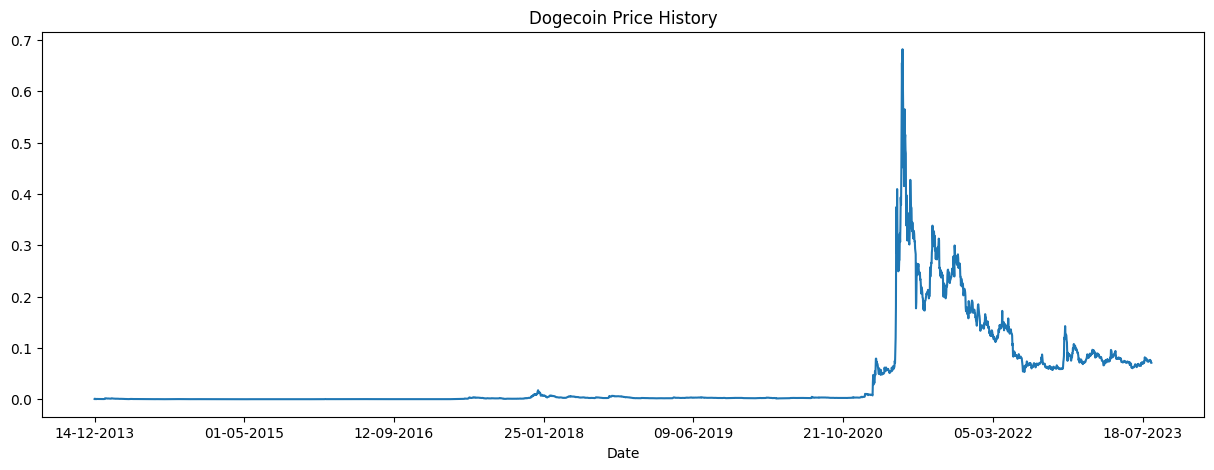

In [32]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_dogecoin['Price dogecoin'].plot(ax=ax)
ax.set_title('Dogecoin Price History')
plt.show()

In [33]:
#get daily historical data
daily_uniswap = cg.get_coin_market_chart_by_id(id = 'uniswap', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_uniswap = cg.get_coin_market_chart_range_by_id(id = 'uniswap', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_uniswap = pd.DataFrame(data = daily_uniswap['prices'],
                                        columns = ['Date', 'Price uniswap'])
#reformat date
df_hist_uniswap['Date'] = df_hist_uniswap['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_uniswap = df_hist_uniswap.set_index('Date')

print(df_hist_uniswap)

            Price uniswap
Date                     
16-09-2020       3.443832
17-09-2020       3.443832
18-09-2020       7.097694
19-09-2020       5.702061
20-09-2020       5.256579
...                   ...
11-08-2023       6.180008
12-08-2023       6.217057
13-08-2023       6.088591
14-08-2023       6.257407
15-08-2023       5.961386

[1064 rows x 1 columns]


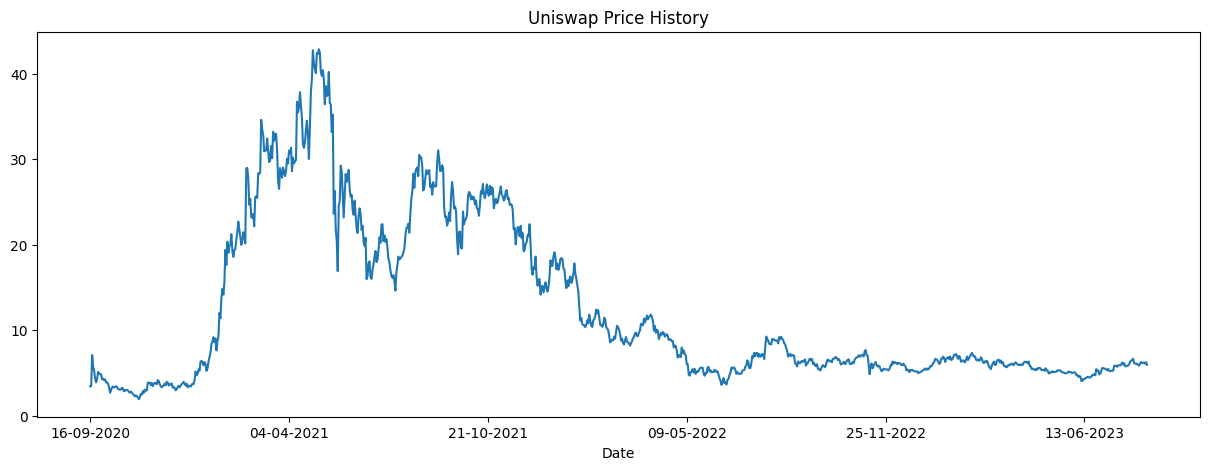

In [34]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_uniswap['Price uniswap'].plot(ax=ax)
ax.set_title('Uniswap Price History')
plt.show()

In [35]:
#get daily historical data
daily_polkadot = cg.get_coin_market_chart_by_id(id = 'polkadot', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_polkadot = cg.get_coin_market_chart_range_by_id(id = 'polkadot', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_polkadot = pd.DataFrame(data = daily_polkadot['prices'],
                                        columns = ['Date', 'Price polkadot'])
#reformat date
df_hist_polkadot['Date'] = df_hist_polkadot['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_polkadot = df_hist_polkadot.set_index('Date')

print(df_hist_polkadot)

            Price polkadot
Date                      
18-08-2020        2.936665
19-08-2020        2.936665
20-08-2020        2.898791
21-08-2020        2.871923
22-08-2020        4.481389
...                    ...
11-08-2023        5.002864
12-08-2023        5.032357
13-08-2023        4.984807
14-08-2023        4.986299
15-08-2023        4.964441

[1093 rows x 1 columns]


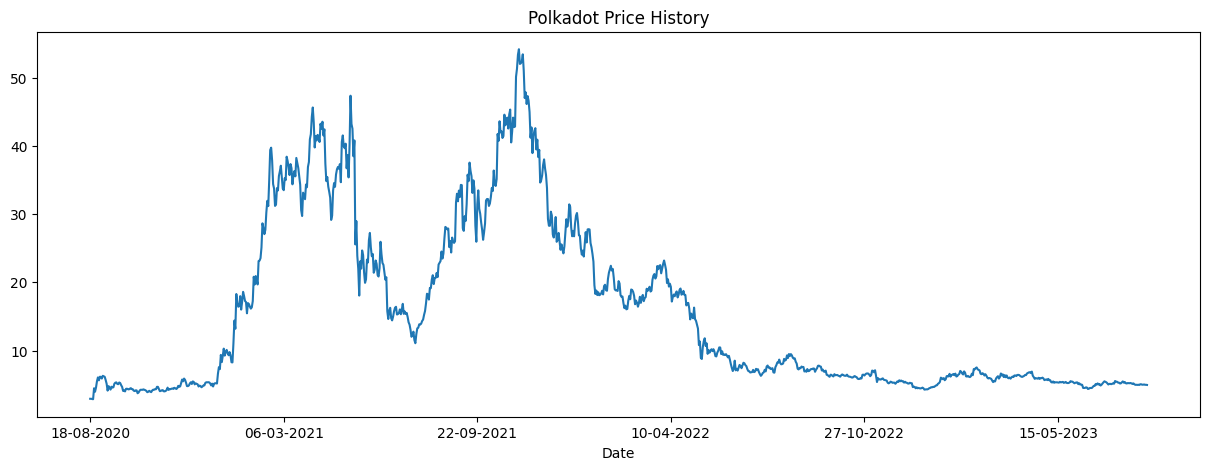

In [36]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_polkadot['Price polkadot'].plot(ax=ax)
ax.set_title('Polkadot Price History')
plt.show()

In [37]:
#get daily historical data
daily_cardano = cg.get_coin_market_chart_by_id(id = 'cardano', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_cardano = cg.get_coin_market_chart_range_by_id(id = 'cardano', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1577854800, 
                                                  to_timestamp = 1703998800)
#list of lists to dataframe 
df_hist_cardano = pd.DataFrame(data = daily_cardano['prices'],
                                        columns = ['Date', 'Price cardano'])
#reformat date
df_hist_cardano['Date'] = df_hist_cardano['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_cardano = df_hist_cardano.set_index('Date')

print(df_hist_cardano)

            Price cardano
Date                     
17-10-2017       0.026845
18-10-2017       0.026830
19-10-2017       0.030300
20-10-2017       0.028588
21-10-2017       0.027796
...                   ...
11-08-2023       0.293325
12-08-2023       0.291666
13-08-2023       0.289372
14-08-2023       0.290452
15-08-2023       0.288284

[2129 rows x 1 columns]


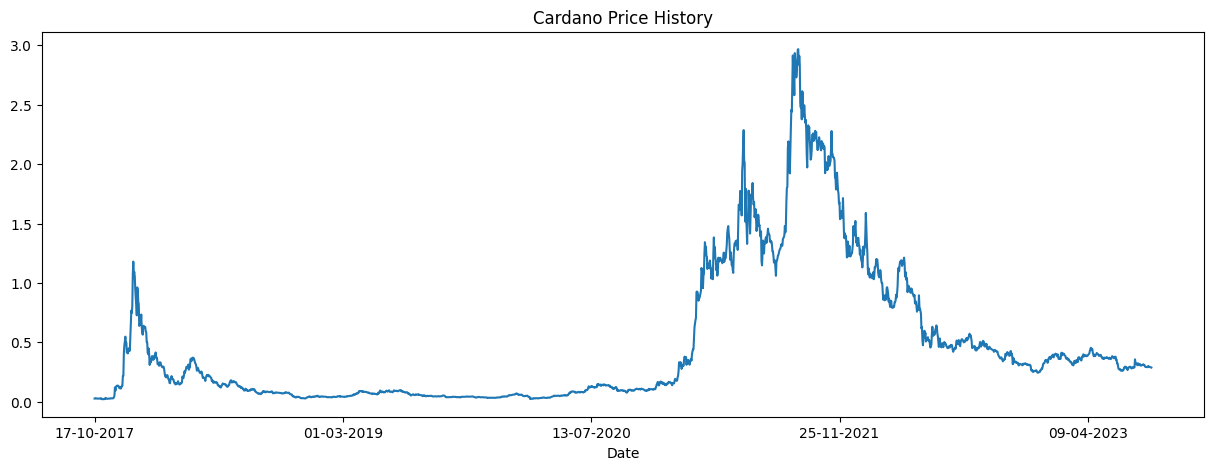

In [49]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_cardano['Price cardano'].plot(ax=ax)
ax.set_title('Cardano Price History')
plt.show()

In [39]:
# Save the DF in csv archive
#df_hist_polkadot.to_csv('Precios polkadot.csv')

In [50]:
# Save the DF in csv archive
#dfmarket_filter.to_csv('Precios historicos.csv', index=False)

In [41]:
archivo = 'Precios.xlsx'

df_price = pd.read_excel(archivo, sheet_name='Precios')

In [42]:
df_price.head(5)

,Date,Price bitcoin,Price cardano,Price chainlink,Price dogecoin,Price ethereum,Price litecoin,Price ripple,Price polkadot,Price solana,Price uniswap
0,2021-01-02,32163.82,0.178,12.22,0.01060,777.70,137.70,0.222,9.22,1.80,4.86
1,2021-01-03,33008.23,0.205,13.65,0.01009,967.00,159.50,0.226,10.28,2.15,5.41
2,2021-01-04,31515.58,0.219,13.31,0.00959,1025.65,152.07,0.235,9.26,2.42,5.27
3,2021-01-05,34082.21,0.259,14.58,0.00984,1103.36,159.06,0.227,9.74,2.16,6.33
4,2021-01-06,36933.52,0.332,17.13,0.01046,1208.58,169.28,0.252,10.10,1.92,6.41


In [43]:
df = df_price.copy()

In [44]:
import matplotlib.pyplot as plt

# Set the Date like index
df = df.set_index('Date')


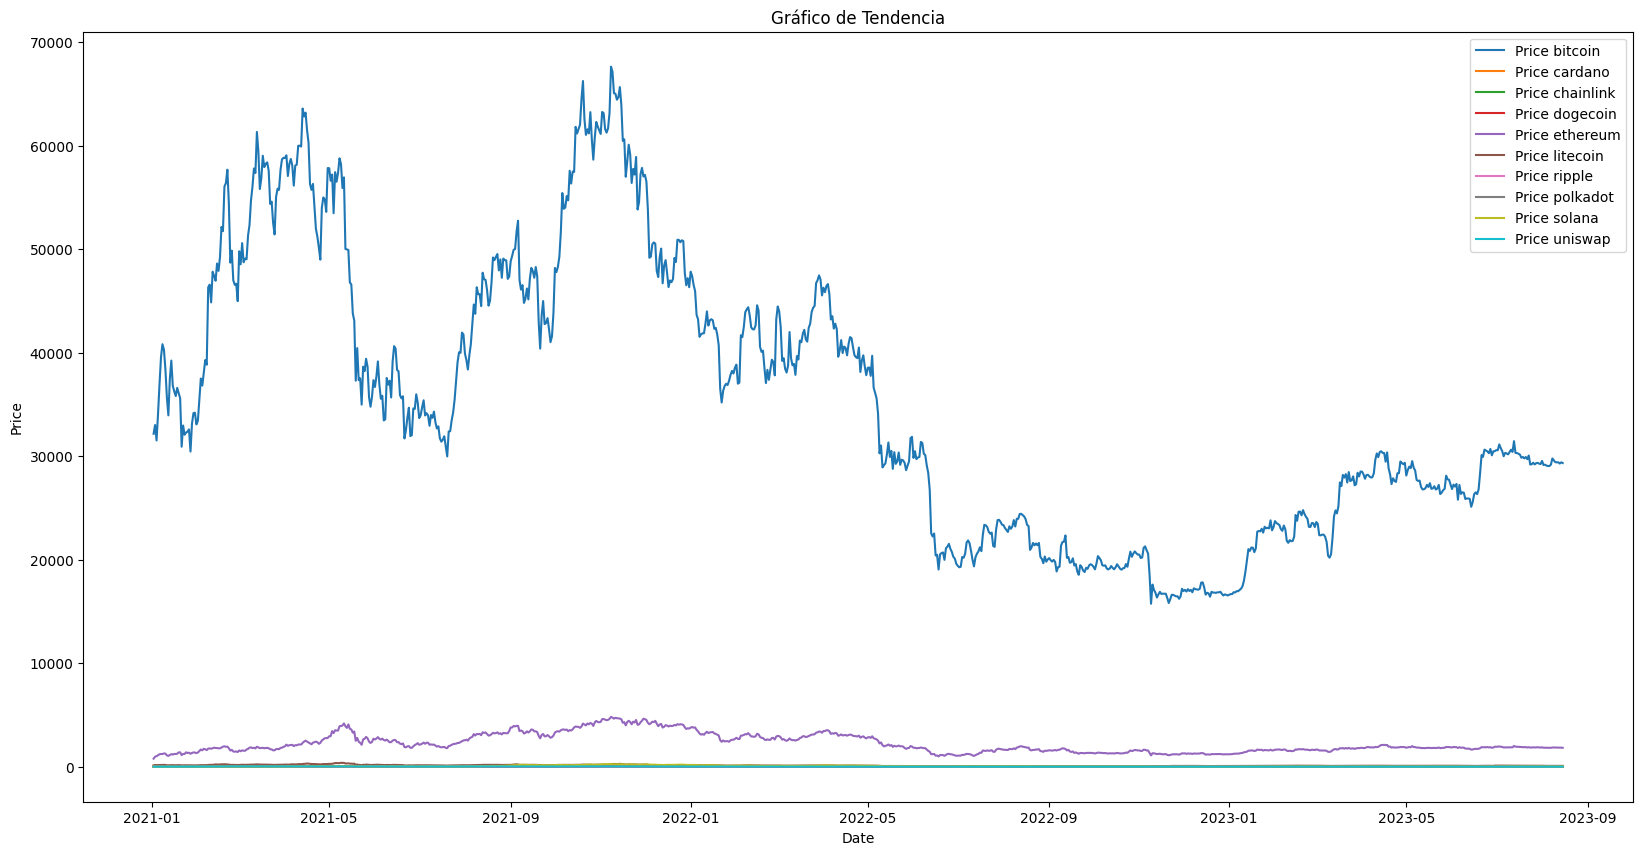

In [45]:
# Create a figure with a specific size
plt.figure(figsize=(20, 10))

#  we create a line chart for each column of 'price'
for column in df.columns:
    plt.plot(df.index, df_price[column], label=column)

# Add some details to the plot
plt.title('Gráfico de Tendencia')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()




In [46]:
df_price.dtypes

Date               datetime64[ns]
Price bitcoin             float64
Price cardano             float64
Price chainlink           float64
Price dogecoin            float64
Price ethereum            float64
Price litecoin            float64
Price ripple              float64
Price polkadot            float64
Price solana              float64
Price uniswap             float64
dtype: object

In [47]:
# Save the DF in csv archive
#df.to_csv('Precios index.csv')

In [48]:
# Calculate the annual ROI for each column for 2021-2022
print("ROI for 2021-2022:")
for column in df.columns:
    initial_value = df.loc['2021-01-02', column]
    final_value = df.loc['2022-01-02', column]
    roi = ((final_value - initial_value) / initial_value) * 100
    print(f"{column}: {roi:.2f}%")

# Calculate the annual ROI for each column for 2022-2023
print("\nROI for 2022-2023:")
for column in df.columns:
    initial_value = df.loc['2022-01-02', column]
    final_value = df.loc['2023-08-15', column]
    roi = ((final_value - initial_value) / initial_value) * 100
    print(f"{column}: {roi:.2f}%")

ROI for 2021-2022:
Price bitcoin: 47.33%
Price cardano: 675.28%
Price chainlink: 78.89%
Price dogecoin: 1546.79%
Price ethereum: 393.17%
Price litecoin: 10.03%
Price ripple: 287.39%
Price polkadot: 222.89%
Price solana: 9695.56%
Price uniswap: 277.57%

ROI for 2022-2023:
Price bitcoin: -38.10%
Price cardano: -79.13%
Price chainlink: -66.70%
Price dogecoin: -57.61%
Price ethereum: -52.31%
Price litecoin: -46.04%
Price ripple: -27.09%
Price polkadot: -83.34%
Price solana: -86.34%
Price uniswap: -67.25%
